In [2]:
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [9]:
file = 'onarrows_all.txt'

with open(file, 'r') as rfp:
    
    data = {}
    
    for i, line in enumerate(rfp):
        if ((i > 33)):#&(i < 50000)):

            ld = line.rstrip().split('\t')
            time = datetime.strptime(ld[2], '%Y-%m-%d %H:%M')
            year = time.year
            flow = ld[-2]
            
            try:
                data[year]
            except:
                data[year] = [[time, flow]]
            else:
                data[year].append([time, flow])

data = {k:np.array(data[k]) for k in data.keys()}

1993
1995
1997
1998
1999
2005
2006
2011
2017
2019


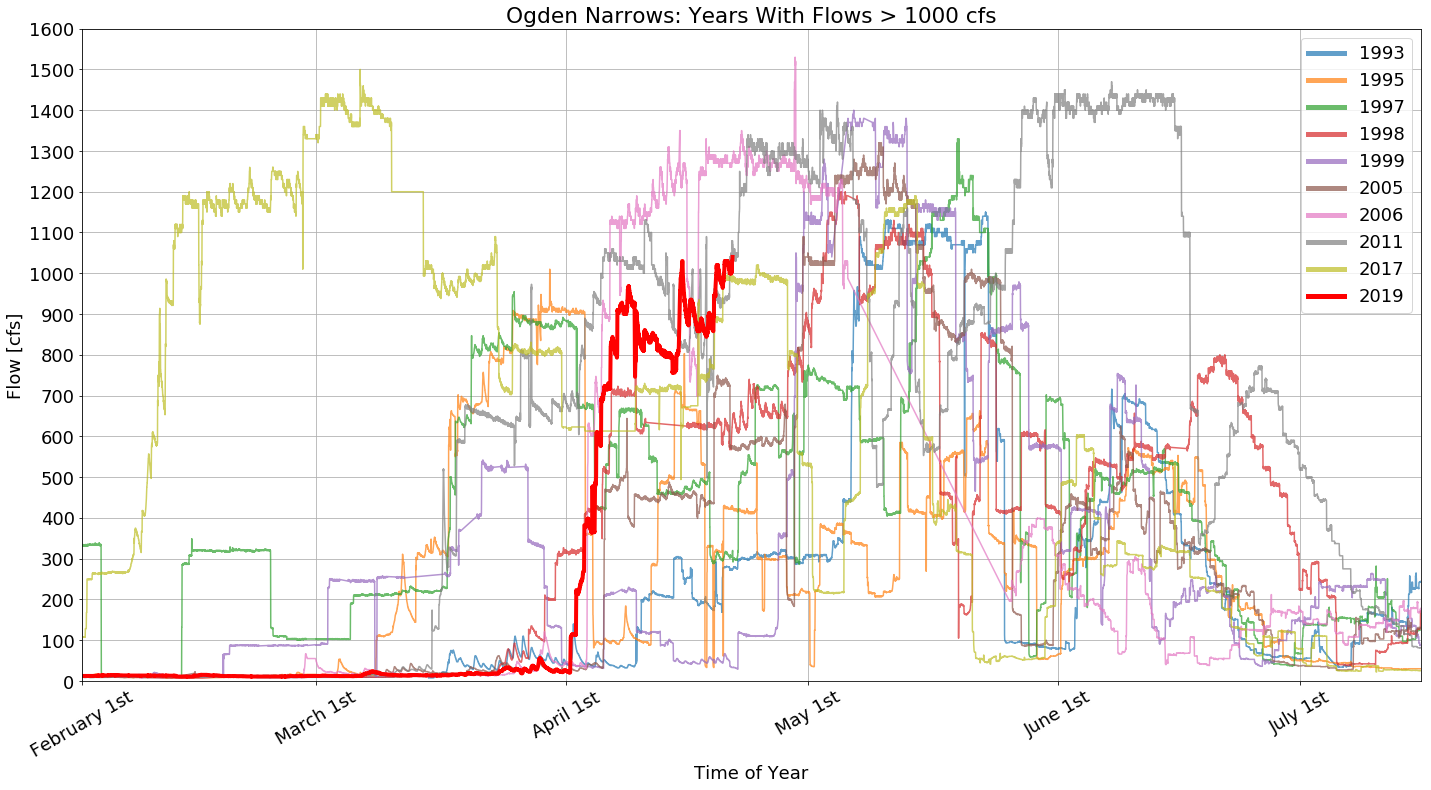

In [56]:
fig = plt.figure(facecolor='w', figsize=(24, 12))
plt.rcParams.update({'font.size': 18})

ax = fig.add_subplot(111)

for yyyy in np.arange(1990, 2020, 1):
        
    plotdates = np.array([x.replace(year=2016) for x in data[yyyy][:,0]])
    plotdata = data[yyyy][:,1].astype(np.float)
    
    if plotdata.max() > 1000:
        print(yyyy)
        
        if yyyy == 2019:
            ax.plot(plotdates, plotdata, linewidth=4, c='r', label=yyyy)
        else:
            ax.plot(plotdates, plotdata, linewidth=1.5, alpha=0.7, label=yyyy)

yt = np.arange(0, 2000, 100)
ax.set_yticks(yt)
ax.set_yticklabels(yt)
ax.set_ylim([0, 1600])
ax.set_ylabel('Flow [cfs]')

months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%B 1st')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30)
ax.set_xlim([datetime(2016, 2, 1, 0, 0), datetime(2016, 7, 15, 23, 59)])
ax.set_xlabel('Time of Year')

leg = ax.legend(loc='upper right')
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
    
ax.grid()

ax.set_title('Ogden Narrows: Years With Flows > 1000 cfs')

plt.show()

1990
1991
1992
1994
1996
2000
2001
2003
2004
2007
2010
2012
2013
2014
2015
2018


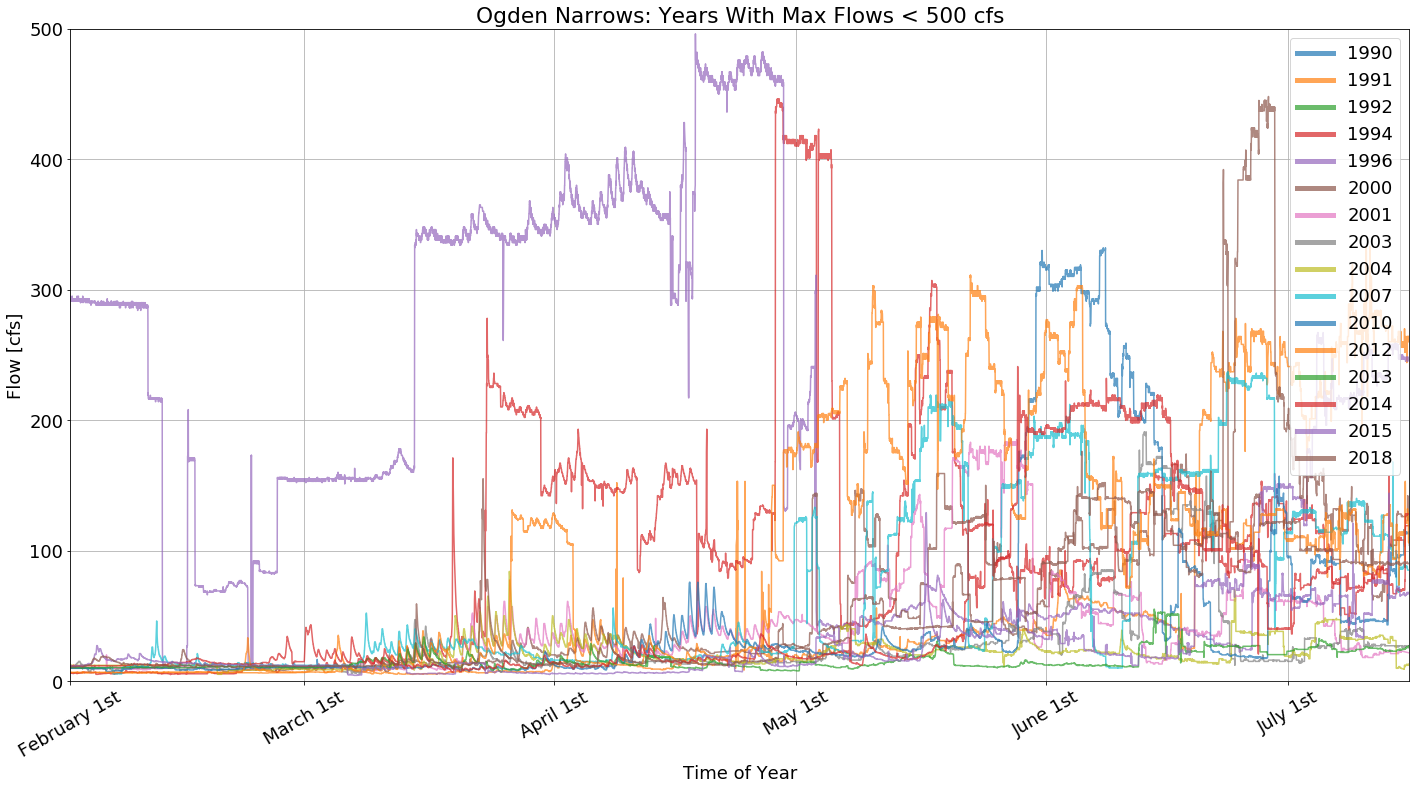

In [55]:
fig = plt.figure(facecolor='w', figsize=(24, 12))
plt.rcParams.update({'font.size': 18})

ax = fig.add_subplot(111)

for yyyy in np.arange(1990, 2020, 1):
        
    plotdates = np.array([x.replace(year=2016) for x in data[yyyy][:,0]])
    plotdata = data[yyyy][:,1].astype(np.float)
    
    if plotdata.max() <= 500:
        print(yyyy)
        
        if yyyy == 2019:
            ax.plot(plotdates, plotdata, linewidth=4, c='r', label=yyyy)
        else:
            ax.plot(plotdates, plotdata, linewidth=1.5, alpha=0.7, label=yyyy)

yt = np.arange(0, 2000, 100)
ax.set_yticks(yt)
ax.set_yticklabels(yt)
ax.set_ylim([0, 500])
ax.set_ylabel('Flow [cfs]')

months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%B 1st')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30)
ax.set_xlim([datetime(2016, 2, 1, 0, 0), datetime(2016, 7, 15, 23, 59)])
ax.set_xlabel('Time of Year')

leg = ax.legend(loc='upper right')
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
    
ax.grid()

ax.set_title('Ogden Narrows: Years With Max Flows < 500 cfs')

plt.show()

In [75]:
for yyyy in np.arange(1991, 2020, 1):
        
    plotdates = np.array([x.replace(year=2016) for x in data[yyyy][:,0]])
    plotdata = data[yyyy][:,1].astype(np.float)
    
    if plotdata.max() > 1000:

        print('{}, {:.0f} cfs, {}'.format(yyyy, plotdata.max(), np.unique([x.strftime('%B') for x in plotdates[np.where(plotdata == plotdata.max())]])[0]))

1993, 1150 cfs, May
1995, 1010 cfs, March
1997, 1330 cfs, May
1998, 1210 cfs, May
1999, 1400 cfs, May
2005, 1320 cfs, May
2006, 1530 cfs, April
2011, 1470 cfs, June
2017, 1500 cfs, March
2019, 1040 cfs, April
